<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [38]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,7,24,24,34,138,138,138,138,139,159,222,25,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,36,109,186,252,252,253,252,252,252,252,253,252,240,37,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,222,252,252,252,252,253,208,183,183,183,184,162,50,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,211,252,252,134,45,46,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,34,252,252,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


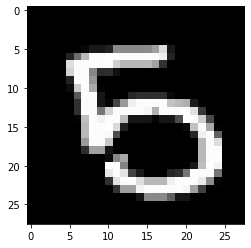

In [39]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 處裡圖片
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
# 一個神經元: binary crossentropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元: categorical crossentropy p1 log 1/q1 +.....
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [43]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 3s - loss: 0.3034 - accuracy: 0.9160 - val_loss: 0.1253 - val_accuracy: 0.9637
Epoch 2/50
540/540 - 2s - loss: 0.1248 - accuracy: 0.9636 - val_loss: 0.0977 - val_accuracy: 0.9743
Epoch 3/50
540/540 - 2s - loss: 0.0842 - accuracy: 0.9755 - val_loss: 0.0800 - val_accuracy: 0.9783
Epoch 4/50
540/540 - 2s - loss: 0.0610 - accuracy: 0.9825 - val_loss: 0.0740 - val_accuracy: 0.9777
Epoch 5/50
540/540 - 2s - loss: 0.0472 - accuracy: 0.9868 - val_loss: 0.0683 - val_accuracy: 0.9818
Epoch 6/50
540/540 - 2s - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.0692 - val_accuracy: 0.9813
Epoch 7/50
540/540 - 2s - loss: 0.0284 - accuracy: 0.9921 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 8/50
540/540 - 2s - loss: 0.0227 - accuracy: 0.9944 - val_loss: 0.0706 - val_accuracy: 0.9802
Epoch 9/50
540/540 - 2s - loss: 0.0168 - accuracy: 0.9960 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 10/50
540/540 - 2s - loss: 0.0143 - accuracy: 0.9965 - val_loss: 0.0650 - val_accuracy: 0.9838

In [44]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.9798


[0.06311114132404327, 0.9797999858856201]

In [45]:
# 手動儲存: model.save("model.h5")
from tensorflow.keras.models import load_model
load = load_model("/content/drive/My Drive/Colab Notebooks/model.h5")
# 不用再compile, 可以直接繼續fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9798


[0.06311114132404327, 0.9797999858856201]

In [46]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in range(10)],
      columns=["{}(預測)".format(n) for n in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),969,0,2,1,0,3,2,1,1,1
1(原本),0,1127,3,0,0,1,2,0,2,0
2(原本),3,2,1011,1,1,0,2,4,7,1
3(原本),1,0,3,986,0,8,0,3,5,4
4(原本),1,1,4,1,965,1,3,0,0,6
5(原本),1,0,0,4,1,880,2,0,2,2
6(原本),4,2,1,1,2,11,934,0,3,0
7(原本),1,5,10,4,2,0,0,994,3,9
8(原本),4,0,1,4,5,7,1,2,947,3
9(原本),2,4,0,2,7,4,1,4,0,985
